## Prediccion de precios de alquileres Medellin

In [1]:
# Librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns # Graficos
import matplotlib.pyplot as plt # Graficos
sns.set_theme() #tema graficos

### Conociendo Train Base

In [2]:
# Extraigo la base
df_train = pd.read_csv('bd_train.csv')

In [3]:
# Primer vistado de la base
df_train.head()

,precio,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
0,1386600.0,50,2002,0,0,0,0,0,2
1,844000.0,54,2002,0,0,0,0,0,2
2,1473200.0,70,2002,0,0,0,0,0,2
3,2590200.0,55,1923,0,0,0,0,0,2
4,790000.0,46,1987,0,0,0,1,0,2


In [4]:
# Cómo está compuesta la base
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       1576 non-null   float64
 1   metros2      1576 non-null   int64  
 2   anyo         1576 non-null   int64  
 3   banyo        1576 non-null   int64  
 4   Sp           1576 non-null   int64  
 5   Sm           1576 non-null   int64  
 6   calefaccion  1576 non-null   int64  
 7   cocina       1576 non-null   int64  
 8   situacion    1576 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 110.9 KB


* Tengo 8 variables predictoras y una variables dependiente (Precio)
* No hay valores null
* La base consta de 1576 registro

### Analizando el comportamiento del Precio
Me va permitir conocer como está compuesto el precio que quiero predecir, que tan alejados están entre si y cuál es su distribución

In [42]:
# Análisis Descriptivo
df_train['precio'].describe().round(2)

count       1576.00
mean     1627957.87
std       758564.55
min       203400.00
25%      1088400.00
50%      1477000.00
75%      2044600.00
max      5739800.00
Name: precio, dtype: float64

* El promedio es más alto que la media, lo que indicaría que hay mayor cantidad de valores menores y la curvatura esta hacia la izquierda

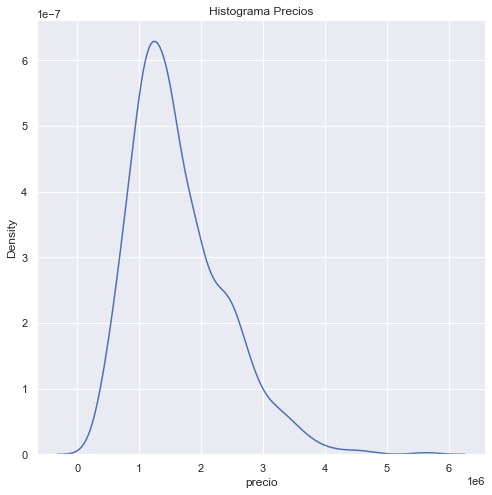

In [6]:
# Densidad del Precio en millones
sns.displot(df_train['precio'], kind = 'kde', height = 7).set(title = 'Histograma Precios') 

* Como lo habíamos visto previamente en el descriptivo la distribución de los precios está más hacia la izquierda

In [44]:
# Simetria y Curtosis
print('Asimetria:',df_train['precio'].skew().round(2), '  Curtosis:', df_train['precio'].kurt().round(2))

Asimetria: 1.01   Curtosis: 1.44


* Se muestra una asimetria positiva
* Con una curtosis al parecer alta
* Lo que nos confirma que los precios no tienen una disribucion normal

### Relacion de Variables
En esta etapa vamos a analizar la relación del precio con la otras variables, tanto numéricas como categóricas. Esto nos dará una idea de cuánto impacta cada variable en nuestro precio a predecir

#### Metros2 Vs Precios

[Text(0.5, 1.0, 'Relacion Metros2 vs Precio')]

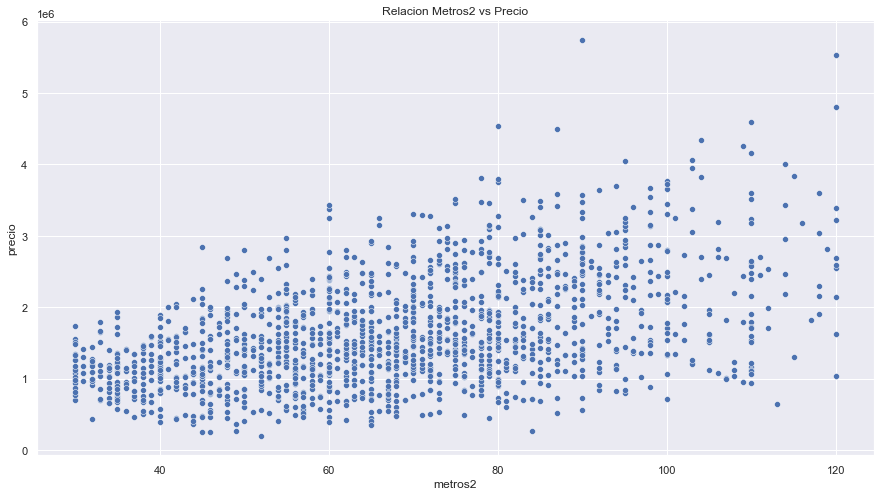

In [8]:
# metros2 vs precio
plt.figure(figsize = (15,8))
sns.scatterplot(x = df_train['metros2'], y = df_train['precio']).set(title = 'Relacion Metros2 vs Precio')

* Se ve que al parecer a medida que aumenta el metro2 el precio aumenta, podemos afirmar que existe una correlación positiva

#### Anyo vs Precio

[Text(0.5, 1.0, 'Precio através de los años')]

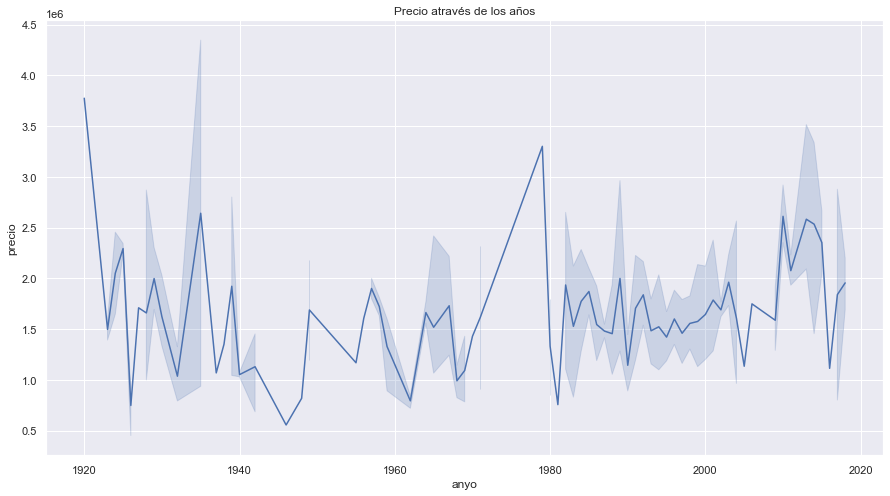

In [9]:
# anyo vs precio
plt.figure(figsize = (15,8))
sns.lineplot(data = df_train, x = 'anyo', y = 'precio').set(title = 'Precio através de los años')

* Se ve una gráfica bastante volatil en los años, pero no se muestra ningún aumento o disminución a medida que avanzan los años

#### Banyo vs precio

[Text(0.5, 1.0, 'Precio según Banyo')]

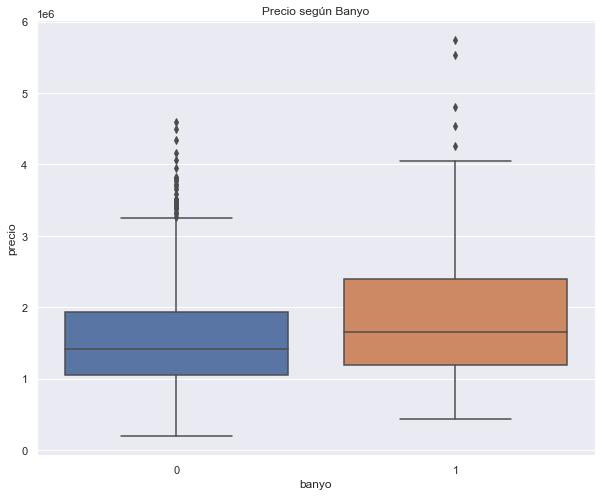

In [10]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df_train['banyo'], y = df_train['precio']).set(title = 'Precio según Banyo')

* Podemos ver que las viviendas con cuarto de baño tienen precios priomedio más altos que los que no tienen cuarto de baño
* También podemos ver que los precios de las viviendas más caras son las que cuentan con cuarto de baño

#### Calefaccion vs Precio

[Text(0.5, 1.0, 'Precio según Calefaccion')]

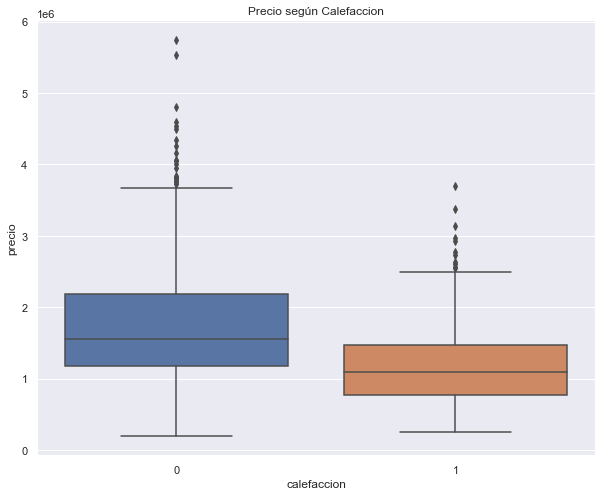

In [13]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df_train['calefaccion'], y = df_train['precio']).set(title = 'Precio según Calefaccion')

* Al parecer la calefacción influye de manera negativa al precio
* Las viviendas con calefacción central tienen menor precio que las que no tienen calefacción central
* El clima de Medellín podría influir en esto, ya que no es un lugar que tenga temperaturas muy bajas, por lo que la calefaccion no es valorada

#### Precio vs Cocina

[Text(0.5, 1.0, 'Precio según cocina')]

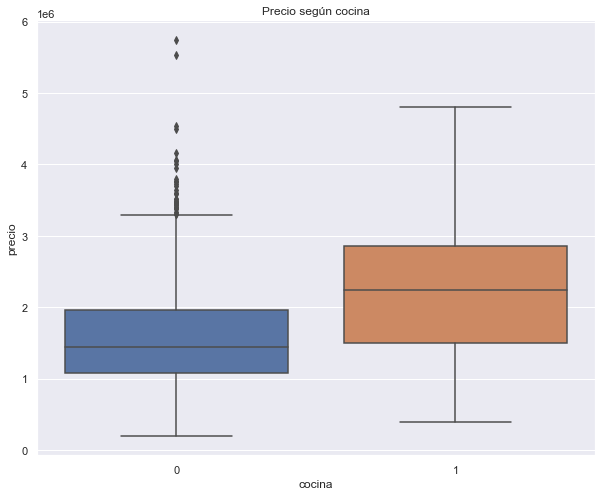

In [14]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df_train['cocina'], y = df_train['precio']).set(title = 'Precio según cocina')

* La diferencia de precios promedio entre las viviendas que tiene concina equipada y las que no tienen es bastante alta
* Sin embargo, las viviendas que tienen mayor precio no tienen cocina equipada

#### Sp (calidad barrio superior a la media) vs Precio

[Text(0.5, 1.0, 'Precio según SP')]

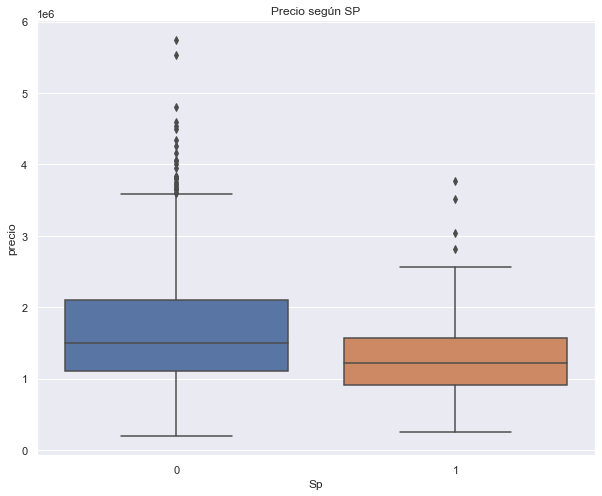

In [15]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df_train['Sp'], y = df_train['precio']).set(title = 'Precio según SP')

* Cuando la calidad del barrio es superior a la media los precio son en promedio menores
* Podríamos decir que cuando la vivienda se encuentra en un barrio de calidad superior a la media no necesarimente su valor es más alto

#### SM (calidad del barrio inferior a la media)  Vs Precio

[Text(0.5, 1.0, 'Precio según SM')]

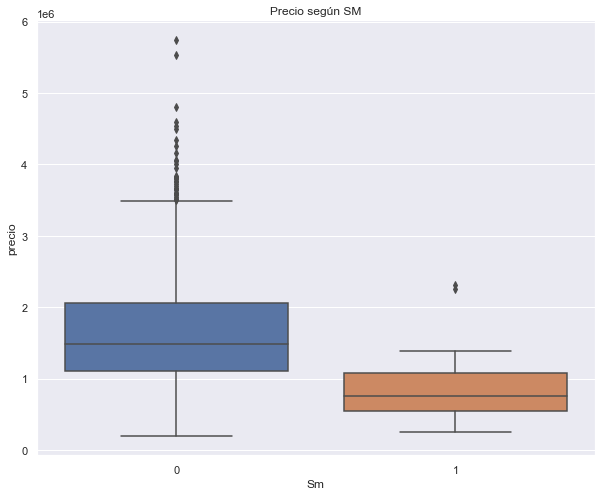

In [16]:
plt.figure(figsize = (10,8))
sns.boxplot(x=df_train['Sm'], y=df_train['precio']).set(title = 'Precio según SM')

* Cuando la calidad del barrio es inferior a la media los precios de las viviendas bajan totalmente
* Lo que nos indica la importancia de este indicador para el precio

#### Situación vs Precio


[Text(0.5, 1.0, 'Precio según Situación')]

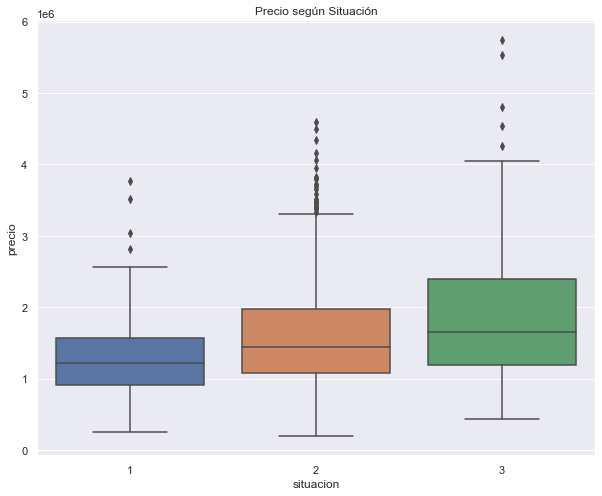

In [18]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df_train['situacion'], y = df_train['precio']).set(title = 'Precio según Situación')

* La variable situación contiene a las variables Sm y Sp, lo que nos muestra que a medida que el barrio va mejorando su situación el precio va subiendo

### Correlaciones
Me ayudrá a conocer el grado que tienen de relación los datos
En caso algunas variables tengan mucha correlacion estarían explicando los mismo y sería mejor eliminarlas

[Text(0.5, 1.0, 'Correlaciones')]

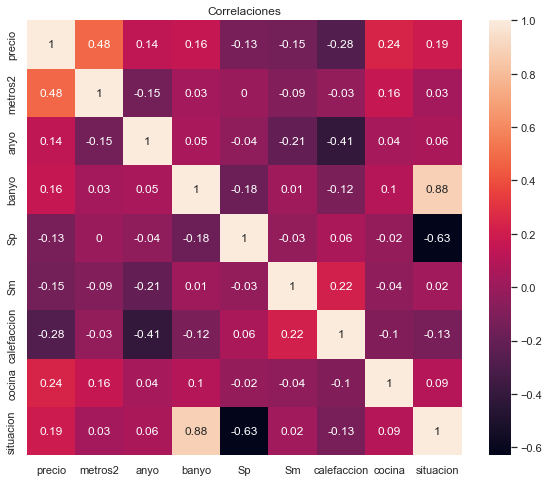

In [19]:
# Correlaciones
corrmat = df_train.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(corrmat, square=True, annot=True).set(title = 'Correlaciones')

* Las correlaciones más altas se presentan en Situación vs banyo (positiva)
* Entiendo el caso, no podríamos decir las viviendas con mejor situación de calidad de barrio sí tienen baños, no tendría sentido. Lo más probable es que esta correlación no explique causalidad por lo que preferimos dejarlas para el modelo

#### Correlación solo con precio

In [57]:
plt.figure(figsize = (10,8))
df_train.corr()['precio'].round(2).sort_values(ascending = False)

precio         1.00
metros2        0.48
cocina         0.24
situacion      0.19
banyo          0.16
anyo           0.14
Sp            -0.13
Sm            -0.15
calefaccion   -0.28
Name: precio, dtype: float64

<Figure size 720x576 with 0 Axes>

* Vemos que las variables con mayor correlación es metros2, pero no hay ninguna variable con corr mayor a 0.5

#### Correlación de metros2 y Precio

<AxesSubplot:xlabel='metros2', ylabel='precio'>

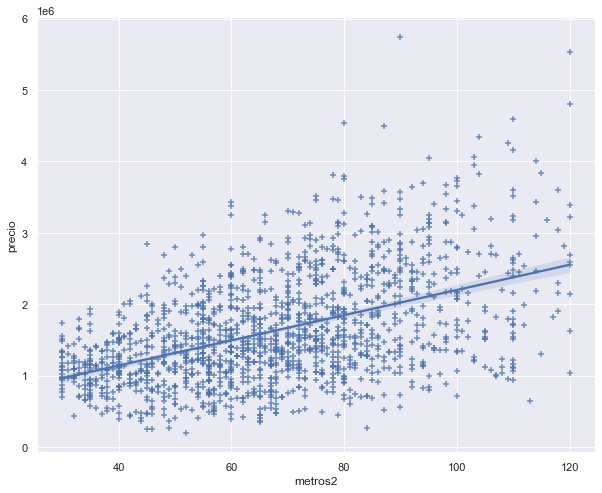

In [58]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'metros2', y = 'precio', data = df_train, marker='+').set(title = 'metros2 vs Precio')

* Sí se muestra una correlacion positiva entre ambas variables

### Transformación
Como vimos en una primera etapa la gráficas de distribución no era normal del todo, usaremos stats para validar y transformar a una distribución normal

In [22]:
#libreria necesarias para validar y transformar
from scipy.stats import norm
from scipy import stats 

c:\Users\Anna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


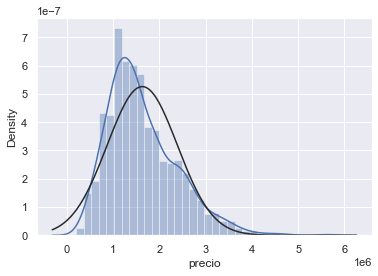

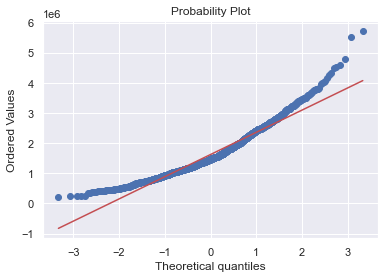

In [23]:
# Distribución no normal actual
sns.distplot(df_train['precio'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['precio'], plot = plt)

* Se muestra la curvatura actual vs una curvatura normal
* El porbability plot también muestra desfases que indican que no es una distribución normal

Transformamos la distribución para normalizarla

In [24]:
# transformando la distribución 
df_train['precio'] = np.log(df_train['precio'])

c:\Users\Anna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


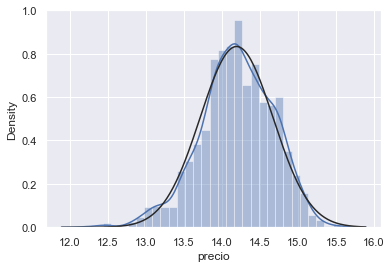

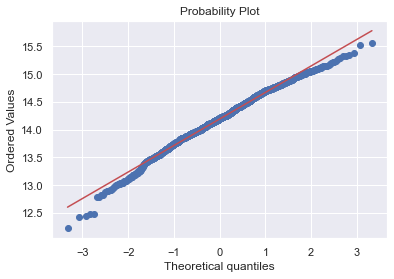

In [25]:
# Distribución transformada con log
sns.distplot(df_train['precio'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['precio'], plot=plt)

* Ahora vemos que la curva de la distribución se asemeja más a la curva normal
* Tambien se muestran menos desfases que el caso anterior, indicadonos que tiene ahora sí una distribución normal

Graficando la nueva relación entre metros y precio log

[Text(0.5, 1.0, 'metros2 vs Precio log')]

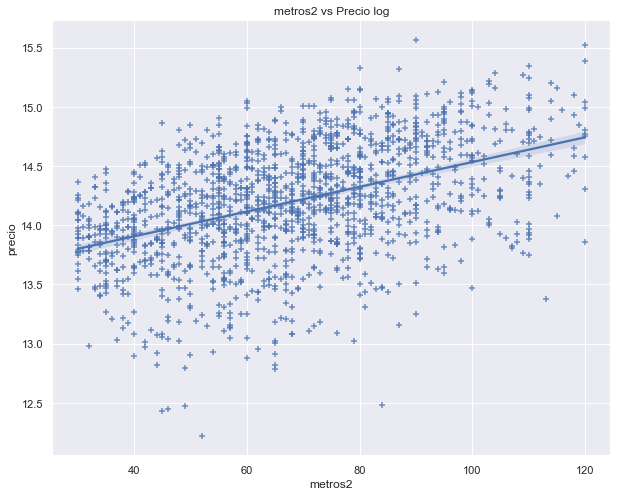

In [27]:
plt.figure(figsize = (10,8))
sns.regplot(x = 'metros2', y = 'precio', data = df_train, marker='+').set(title = 'metros2 vs Precio log')

### Modelamiento
* Usaremos 6 modelos para predecir el precio en base a todas las variables con las que contamos
* Evaluaremos los modelos en base a RMSE que nos genere cada uno
* El modelo con el mejor RMSE será el elegido


Que comience el juego!


In [28]:
# librerias para test split
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
# separo la variable dependiente
x = df_train.drop(columns = ['precio']).copy()
y = df_train['precio']

* Para este ejercicio definimos train como el 75% de la data que tenemos
* Test el 10% de la data
* Validador el 15% de la data

In [30]:
train = 0.75
val = 0.15
test = 0.10

# split train
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = train)

# split test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = test/(test + val)) 



#### Regresion Lineal

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg_lin = LinearRegression()
reg_lin.fit(x_train, y_train)
pred_reg_lin = reg_lin.predict(x_test)
df_reg_lin = pd.DataFrame({'Actual': y_test, 'Predicho': pred_reg_lin})

In [33]:
df_reg_lin.sample(3).round(2)

,Actual,Predicho
531,13.25,13.91
722,13.95,14.42
675,13.66,14.20


In [34]:
rmse_reg_lin = np.sqrt(metrics.mean_squared_error(df_reg_lin['Actual'], df_reg_lin['Predicho'], squared = False)).round(4)
print('RMSE regresion Lineal:', rmse_reg_lin)


RMSE regresion Lineal: 0.6543


#### Ridge

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
df_ridge = pd.DataFrame({'Actual': y_test, 'Predicho': pred_ridge})

In [37]:
df_ridge.sample(3).round(2)

,Actual,Predicho
694,13.92,13.95
1114,14.75,14.22
1505,14.75,14.19


In [38]:
rmse_ridge = np.sqrt(metrics.mean_squared_error(df_ridge['Actual'], df_ridge['Predicho'], squared = False)).round(4)
print('RMSE ridge:', rmse_ridge)


RMSE ridge: 0.6542


#### Lasso

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
df_lasso = pd.DataFrame({'Actual': y_test, 'Predicho': pred_lasso})

In [41]:
df_lasso.sample(3).round(2)

,Actual,Predicho
806,14.35,14.04
446,14.37,14.47
804,14.08,14.08


In [42]:
rmse_lasso = np.sqrt(metrics.mean_squared_error(df_lasso['Actual'], df_lasso['Predicho'], squared = False)).round(4)
print('RMSE ridge:', rmse_lasso)

RMSE ridge: 0.6786


#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dctree = DecisionTreeRegressor()
dctree.fit(x_train, y_train)
pred_dctree = dctree.predict(x_test)
df_dctree = pd.DataFrame({'Actual': y_test, 'Predicho': pred_dctree})

In [45]:
df_dctree.sample(3).round(2)

,Actual,Predicho
898,13.71,13.97
112,14.01,14.32
806,14.35,14.02


In [46]:
rmse_dctree = np.sqrt(metrics.mean_squared_error(df_dctree['Actual'], df_dctree['Predicho'], squared = False)).round(4)
print('RMSE decision Tree:', rmse_dctree)

RMSE decision Tree: 0.7282


#### RandomForestRegressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rand_for = RandomForestRegressor()
rand_for.fit(x_train, y_train)
pred_rand_for = rand_for.predict(x_test)
df_rand_for = pd.DataFrame({'Actual': y_test, 'Predicho': pred_rand_for})

In [49]:
df_rand_for.sample(3).round(2)

,Actual,Predicho
1161,13.21,13.59
428,14.20,13.91
592,13.86,14.11


In [50]:
rmse_rand_for = np.sqrt(metrics.mean_squared_error(df_rand_for['Actual'], df_rand_for['Predicho'], squared = False)).round(4)
print('RMSE Random Forest:', rmse_rand_for)

RMSE Random Forest: 0.6756


#### KNN Regressor

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
df_knn = pd.DataFrame({'Actual': y_test, 'Predicho': pred_knn})

In [53]:
df_knn.sample(3).round(2)

,Actual,Predicho
1253,13.18,13.63
736,14.36,14.16
1049,14.05,14.29


In [54]:
rmse_knn= np.sqrt(metrics.mean_squared_error(df_knn['Actual'], df_knn['Predicho'], squared = False)).round(4)
print('RMSE KNN:', rmse_knn)

RMSE KNN: 0.6579


#### Escogiendo el modelo

In [56]:
# junto los RMSE de todos los modelos escogidos
rmse_df = pd.DataFrame({'Modelo': ('Regresion Lineal','Ridge','lasso', 'dc tree', 'knn', 'random forest'),
                        'RMSE': (rmse_reg_lin, rmse_ridge, rmse_lasso, rmse_dctree, rmse_knn, rmse_rand_for)})
                        
rmse_df.sort_values(by ='RMSE', ascending = True)

,Modelo,RMSE
1,Ridge,0.6542
0,Regresion Lineal,0.6543
4,knn,0.6579
5,random forest,0.6756
2,lasso,0.6786
3,dc tree,0.7282


[Text(0.5, 1.0, 'RMSE por modelo')]

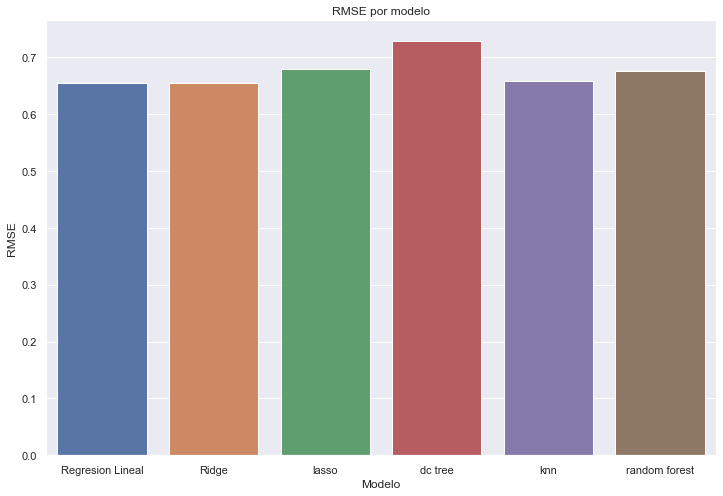

In [57]:
# Vemos de forma grafica
plt.figure(figsize = (12,8))
sns.barplot(x = rmse_df['Modelo'], y = rmse_df['RMSE']).set(title = 'RMSE por modelo')

* Si bien hay poca diferencia entre el RMSE de Ridge Model con la Regresión Lineal, en este caso escogeremos el menor RMSE

### Modelo Elegido Ridge Model

In [58]:
# Aplicando el modelo a la data validadora
ridge = Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_val)
df_ridge = pd.DataFrame({'Actual': y_val, 'Predicho': pred_ridge})
rmse_ridge = np.sqrt(metrics.mean_squared_error(df_ridge['Actual'], df_ridge['Predicho'], squared = False)).round(4)
print('RMSE ridge:', rmse_ridge)

RMSE ridge: 0.625


Podemos ver la importancia que el modelo le está dando a cada variable para hacer si predicción

[Text(0.5, 1.0, 'Importancia de las variables')]

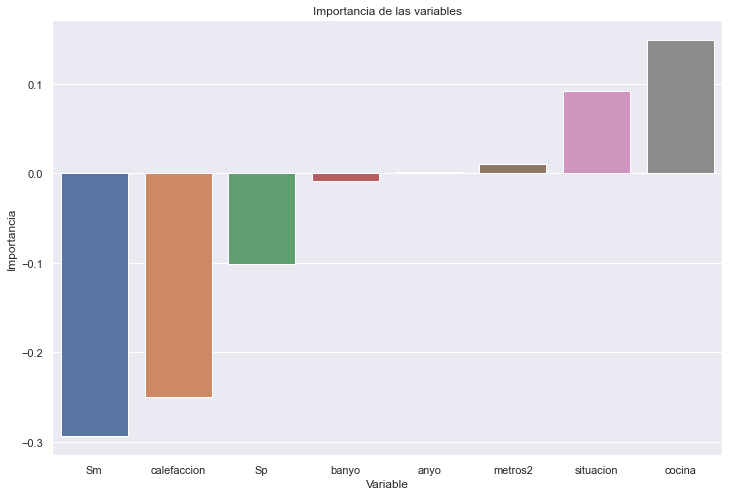

In [59]:
impotancia = ridge.coef_
varible = x_train.columns

importancia_ridge = pd.DataFrame({'Variable': varible, 'Importancia': impotancia}).sort_values(by='Importancia', ascending = True)

plt.figure(figsize = (12,8))
sns.barplot(x = importancia_ridge['Variable'], y= importancia_ridge['Importancia']).set(title = 'Importancia de las variables')

* La variable más importante es la SM que impacta de manera negativa, como vimos anteriormente que las vivienda se encuentre en una barrio por debajo de la media impacta fuertemente en el precio de esta
* La calefacción no es una variable que impacte positivamente a el precio de la vivienda por lo que esta no debería ser ofrecia como una mejora pues no es valorada
* Las viviendas con cocina equipada si impactan de manera positiva en el precio de la vivienda, lo cual sería un gran diferenciador al memomento de ofrece la vivienda

### Aplicando a bd_test

In [60]:
# test dataframe
df_test = pd.read_csv('bd_test.csv')
df_test['index'] = df_test.index
id = df_test['index']

In [61]:
# modelando test dataframe y regresando a los precios reales
sub_ridge = ridge.predict(df_test.drop(['index'],axis = 1))
sub_ridge = np.expm1(sub_ridge) #anti log
df_sub_ridge = pd.DataFrame({'id': id, 'precio': sub_ridge})
df_sub_ridge

,id,precio
0,0,1.324940e+06
1,1,1.253142e+06
2,2,1.113225e+06
3,3,1.903458e+06
4,4,2.058034e+06
...,...,...
388,388,2.122247e+06
389,389,1.430012e+06
390,390,1.544947e+06
391,391,2.308753e+06


In [62]:
# test df evaluado
df_sub_ridge.to_csv('bd_test_evaluate.csv',index=False)